![Fraud](./img/Fraud.png)
# Employment Scam Aegean Dataset
## 0. Imports and global settings

In [1]:
import library as lib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import FreqDist, RegexpTokenizer, word_tokenize
import pandas as pd
import re
import seaborn as sns
import string
import warnings

sns.set(palette='RdYlGn', context='talk', rc={'figure.figsize':(15,15)})
warnings.filterwarnings('ignore')
%reload_ext autoreload
%autoreload 2

## 0.1 Creating dataframes

In [2]:
df = pd.read_csv("./fake_job_postings.csv",index_col='job_id')

In [3]:
dflegit = df[df['fraudulent']==0]
dffraud = df[df['fraudulent']==1]

In [4]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0


In [5]:
df.sample(n=50)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
16908,Oracle HCM Fusion tech developer,"US, TX, Addison",NaN,NaN,NaN,Position: Oracle HCM Fusion tech developerLoca...,Technical developer with Oracle Fusion HCM exp...,NaN,0,0,0,Contract,NaN,NaN,NaN,NaN,0
17000,Title/Escrow Closer,"US, FL, Jacksonville",NaN,NaN,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Real Estate,NaN,0
15453,Account Manager,"US, NC, Charlotte",NaN,NaN,Union is a digital marketing agency founded in...,Union is a digital agency that partners with a...,Passion for your craftStrong conceptual abilit...,NaN,0,1,0,Full-time,NaN,NaN,Marketing and Advertising,Advertising,0
6635,HIGH PERFORMANCE COMPUTING SOLUTIONS ENGINEER ...,"US, OR, Portland",NaN,NaN,We Provide Full Time Permanent Positions for m...,The selected applicant will be working closely...,RESPONSIBILITIES:The selected applicant will b...,NaN,0,0,0,NaN,NaN,NaN,Computer Software,NaN,0
14616,Southampton Fragrance and Beauty Promotional S...,"GB, STH, Southampton",NaN,NaN,Established on the principles that full time e...,We are currently recruiting for an exciting Sa...,NaN,NaN,0,1,0,Temporary,NaN,NaN,Cosmetics,NaN,0
525,Senior Java engineer,"EE, 37, Tallinn",Development,NaN,Want to build a 21st century financial service...,TransferWho?Co-founded by Skype’s first employ...,What skills do I need? At least 8 years of han...,TransferWise prides itself on being a fun and ...,0,1,1,Full-time,NaN,NaN,NaN,NaN,0
8734,Product Manager,"GB, , Birmingham or London",NaN,NaN,Friend MTS is a leading provider of technology...,The RoleWe are seeking an experienced product ...,Bachelors degree in any field with demonstrate...,NaN,0,1,0,Full-time,NaN,NaN,Information Technology and Services,Product Management,0
2765,Android UI Automation Engineer,"US, ,",Mobile,NaN,"Come be a part of one of the fastest growing, ...",Fast­growing mobile TV app startup Peel lookin...,Minimum 2 years of Android UI automation exper...,Flexible working hoursMedical/Dental/Vision co...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Quality Assurance,0
9925,Systems Engineer,"NZ, N, Wellington",Infrastructure,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,NaN,What can you expect from us?An open culture wh...,0,1,1,Full-time,Mid-Senior level,Unspecified,Computer Software,Information Technology,0


## 1. Missing values
Let's have a look at the data and see if there are any missing values.

In [6]:
_nalegit = pd.DataFrame(index=['Legit_HasValue','Legit_IsNA'])
_nafraud = pd.DataFrame(index=['Fraud_HasValue', 'Fraud_IsNA'])
for header in dflegit.columns:
    _nalegit[header] = dflegit[header].isna().value_counts()[0]
_nalegit.loc['Legit_IsNA'] = 17014 - _nalegit.loc['Legit_HasValue']
for header in dffraud.columns:
    _nafraud[header] = dffraud[header].isna().value_counts()[0]
_nafraud.loc['Fraud_IsNA'] = 866 - _nafraud.loc['Fraud_HasValue']
_nalegit = (round(_nalegit/17014*100, 1)).T
_nafraud = (round(_nafraud/866*100,1)).T
_na = _nalegit.merge(_nafraud,how='inner',left_on=_nalegit.index, right_on=_nafraud.index)
_na = _na.set_index(_na['key_0']).drop(columns='key_0')
_na.index.names = ['Columns']
_na

,Legit_HasValue,Legit_IsNA,Fraud_HasValue,Fraud_IsNA
Columns,,,,
title,100.0,0.0,100.0,0.0
location,98.1,1.9,97.8,2.2
department,35.3,64.7,38.7,61.3
salary_range,15.5,84.5,25.8,74.2
company_profile,84.0,16.0,32.2,67.8
description,100.0,0.0,99.9,0.1
requirements,85.1,14.9,82.2,17.8
benefits,59.8,40.2,58.0,42.0
telecommuting,100.0,0.0,100.0,0.0


17014


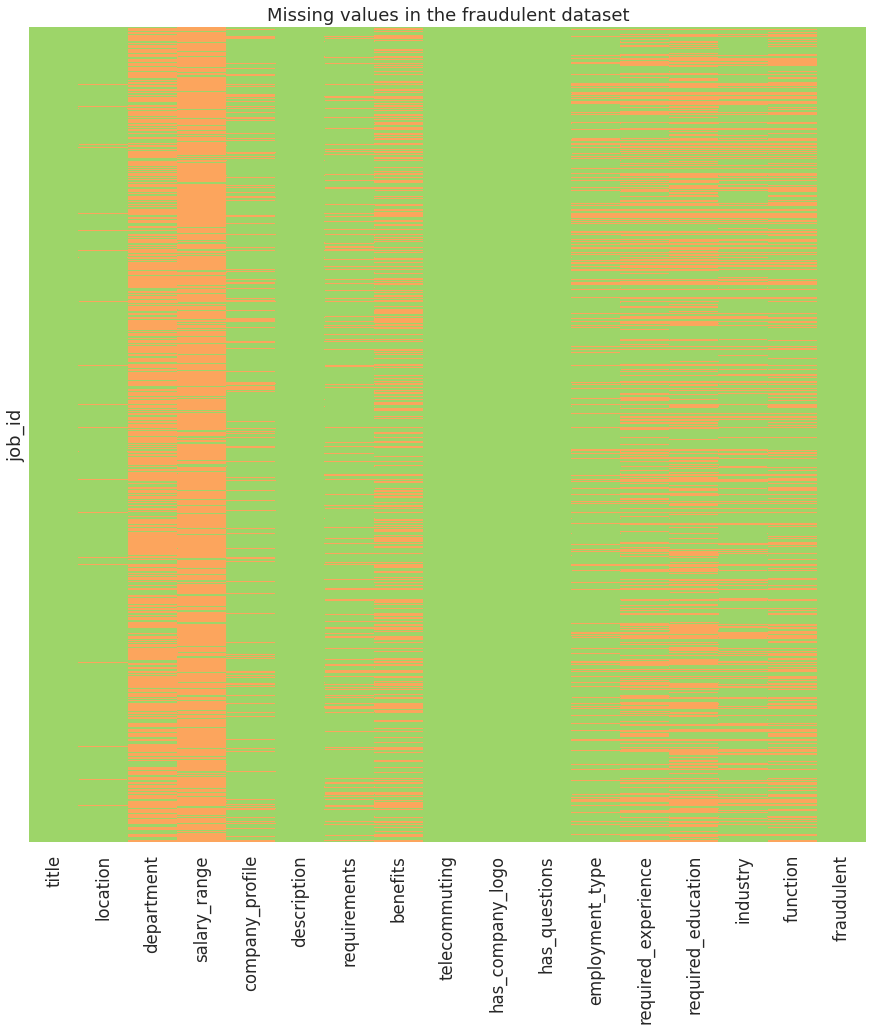

In [7]:
print(len(dflegit))
sns.heatmap(dflegit.isnull(), yticklabels=False, cbar=False, cmap=[sns.color_palette()[4],sns.color_palette()[1]]);
plt.title('Missing values in the fraudulent dataset');

866


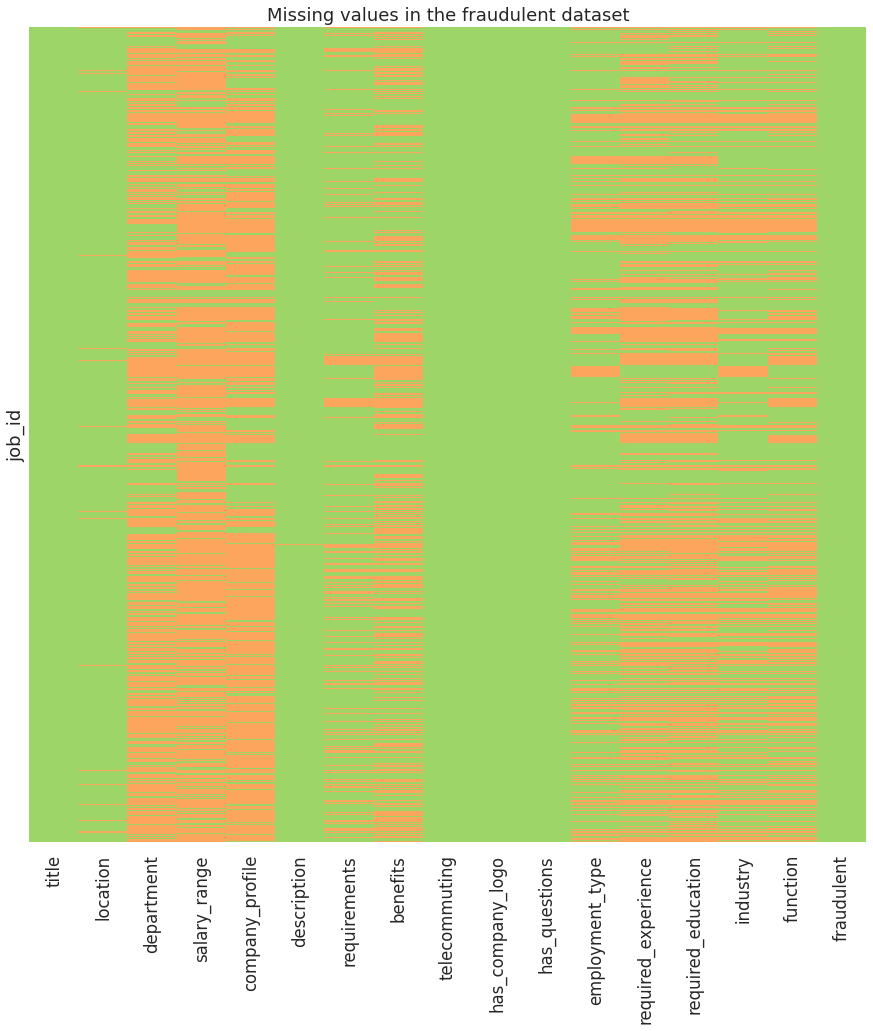

In [8]:
print(len(dffraud))
sns.heatmap(dffraud.isnull(), yticklabels=False, cbar=False, cmap=[sns.color_palette()[4],sns.color_palette()[1]]);
plt.title('Missing values in the fraudulent dataset');

## 1.1 Insight
This dataset contains 17880 jobs and a maximum of 16 characteristics are given to each jobs. On top of this information, all jobs entry have manually been assigned a "fraudulent" value of 1 (the post is fraudulent) or 0 (the post is legitimate); this resulted in 17014 job offers being flagged as legitimate whilst 866 were flagged as fraudulent.

_Note:This assignment was done manually and errors might have occured._

The informations given for each job is separated in the following variables:

| Number | Title | Data type |
|---:|:---:| ---|
| 01 | title | text |
| 02 | location | text |
| 03 | department | text |
| 04 | salary_range | text |
| 05 | company_profile | text |
| 06 | description | text |
| 07 | requirements | text |
| 08 | benefits | text |
| 09 | telecommuting | binary |
| 10 | has_company_logo | binary |
| 11 | has_questions | binary |
| 12 | employment_type | categorical |
| 13 | required_experience | categorical |
| 14 | required_education | categorical |
| 15 | industry | categorical |
| 16 | function | categorical |
| 17 | fraudulent | binary |

There tend to be some repetitions in certain fields; `company_profile` is an obvious one but `description` can be very similar in some cases. This might affect tf-idf scores and might require a more in-depth analysis.

As the missing table shows, fraudulent posts tend to have more missing values than legitimate job posts, especially when it comes down to company profile. However, they seem to be rather keen on giving information about the salary range. Only one job doesn't have a job description (`df[df['description'].isna()==True]`); it is a fraudulent post for a positions as Office manager in Warsaw, PL.

## 2. Text fields
From the missing value visualisations, we can see the fraudsters are struggling with the company profiles... Let's look at text fields in general to see how creative the fraudsters are.
### 2.1 Trimming the text
There are some textual artefact that ned to be removed in order to have a more efficient word analysis.

In the following code,
- The first line will put a space before every capital letter (to avoid a wo.Rd scenario).
- The second line will remove the anonimized contact informations.
- The third line will remove non word characters, including digits.
- The fourth line will remove words shorter than 3 characters.
- The fifth line will convert multiple spaces into one space only.

In [5]:
for column in df.columns[4:8]:
    df[column].replace('([A-Z][a-z]|[A-Z] )', r' \1', regex=True, inplace=True)
    df[column].replace('(#URL\w+|#PHONE\w+|#EMAIL\w+)', ' ', regex=True, inplace=True)
    df[column].replace('(\\W|\\d)', ' ', regex=True, inplace=True)
    df[column].replace(r'\b\w{1,3}\b', ' ', regex=True, inplace=True)
    df[column].replace('\ +', ' ', regex=True, inplace=True)

### 2.2 Word Count

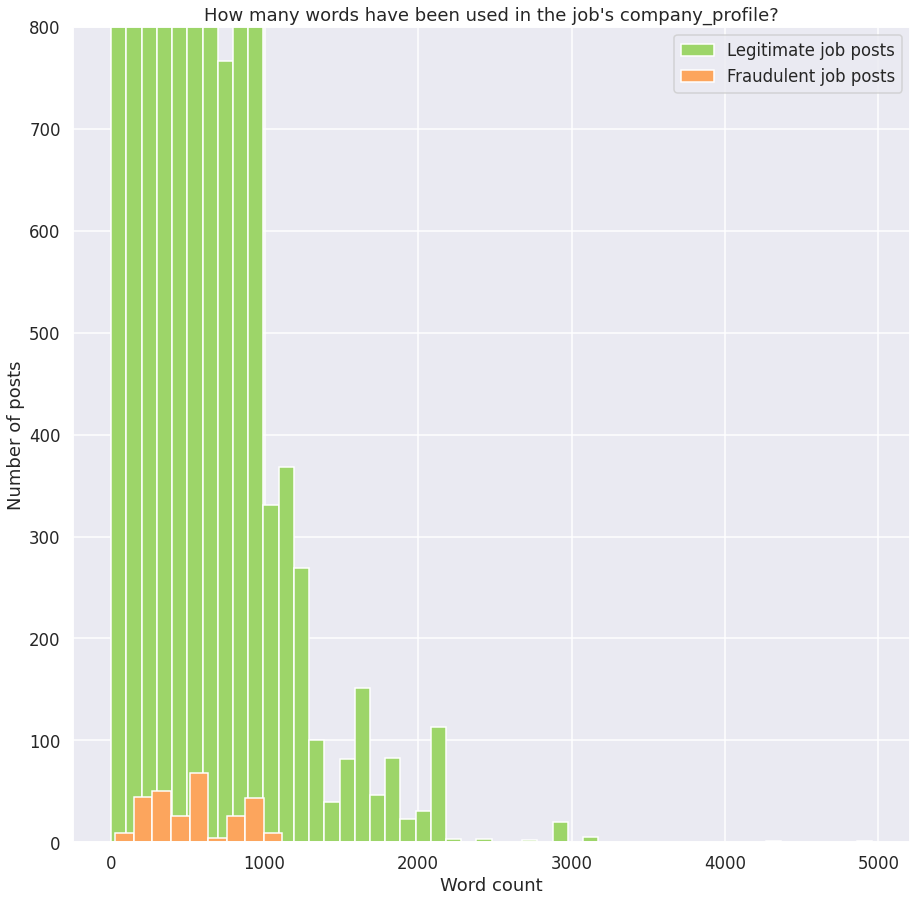

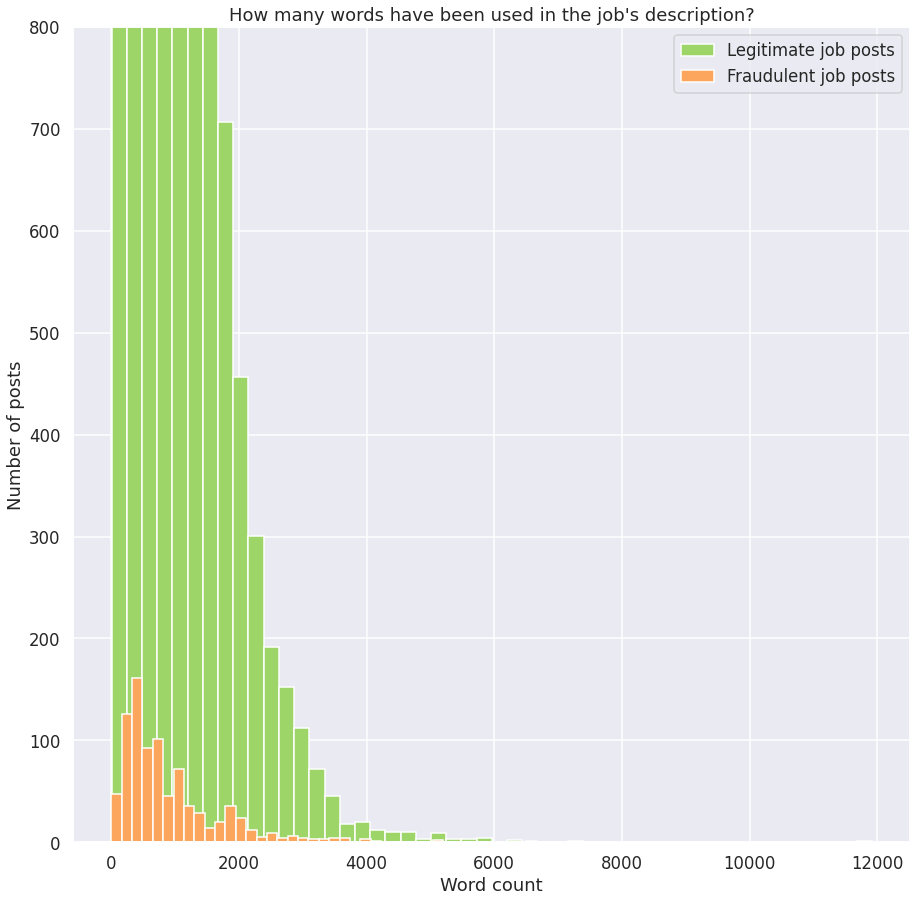

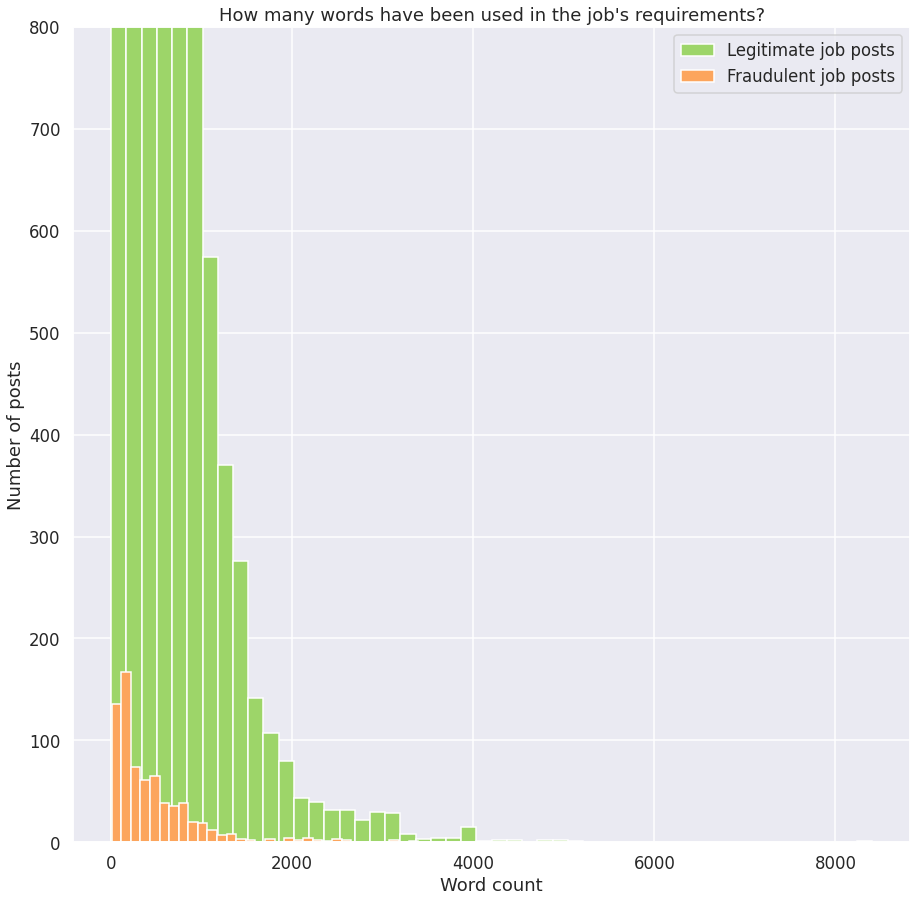

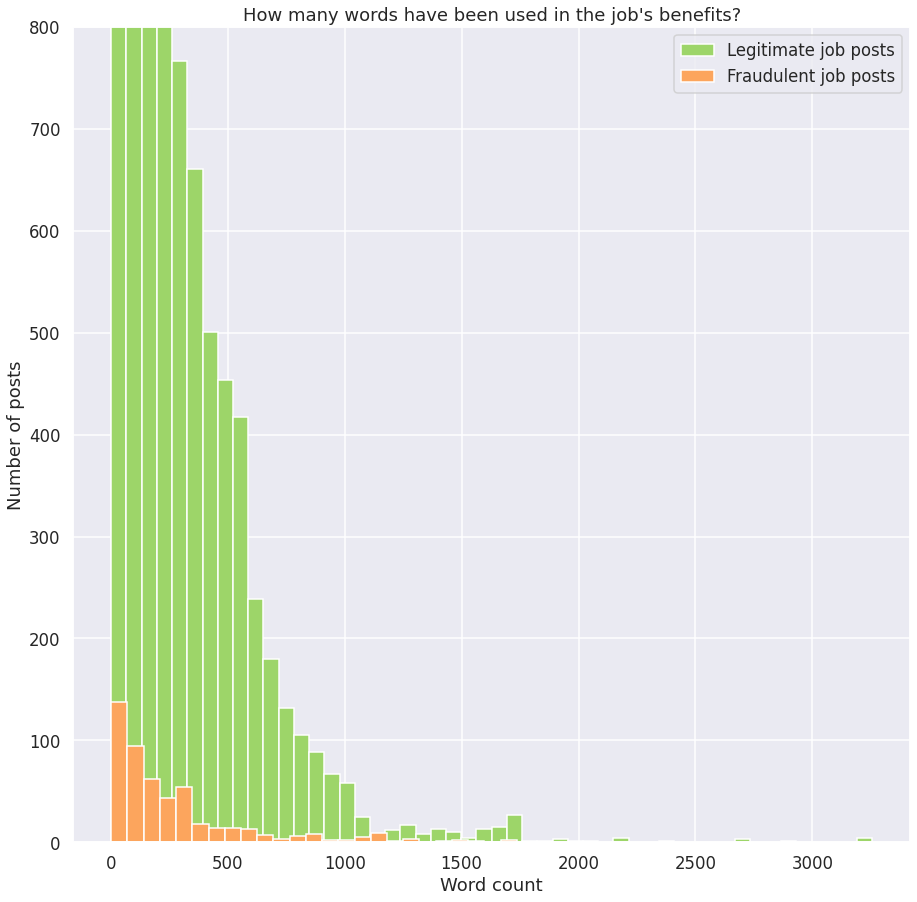

In [10]:
lib.word_dist_plot(df,4,8)

Not only are fraudulent job posts less complete than legitimate ones but even when there is information, the fraudulent job posts are less loquatious than legitimate job posts. Especially for job requirements and company_profile.

Let's have a more detailed look at the content itself.
### 2.3 Word Analysis

In [25]:
# Removing stopwords
stop_words = list(string.punctuation)
stop_words += stopwords.words('english')
stop_words += [i for i in 'qwertyuioplkjhgfdsazxcvbnm']

In [28]:
tokens = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

for profile in dffraud['company_profile']:
    if isinstance(profile, str):
        tokenized_profile = tokenizer.tokenize(profile)
        for word in tokenized_profile:
            tokens.append(word.lower())
    else:
        tokens.append('0')

tokens_cp = [word for word in tokens if word not in stop_words]

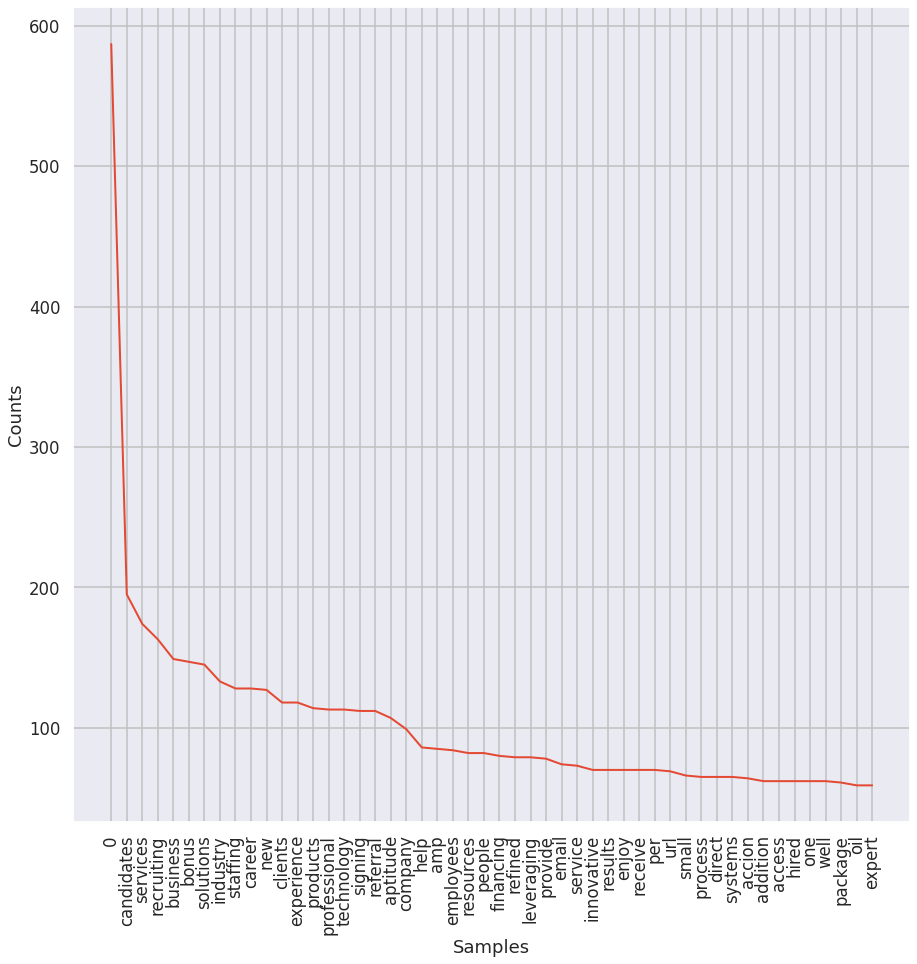

In [30]:
FreqDist(tokens_cp).plot(50)
plt.show()

In [31]:
tokens = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

for profile in dflegit['company_profile']:
    if isinstance(profile, str):
        tokenized_profile = tokenizer.tokenize(profile)
        for word in tokenized_profile:
            tokens.append(word.lower())
    else:
        tokens.append('0')

tokens_cp = [word for word in tokens if word not in stop_words]

In [32]:
len(tokens_cp)
# 948364 for df
# 18771 for dffraud
# 1019554 for dflegit

1019554

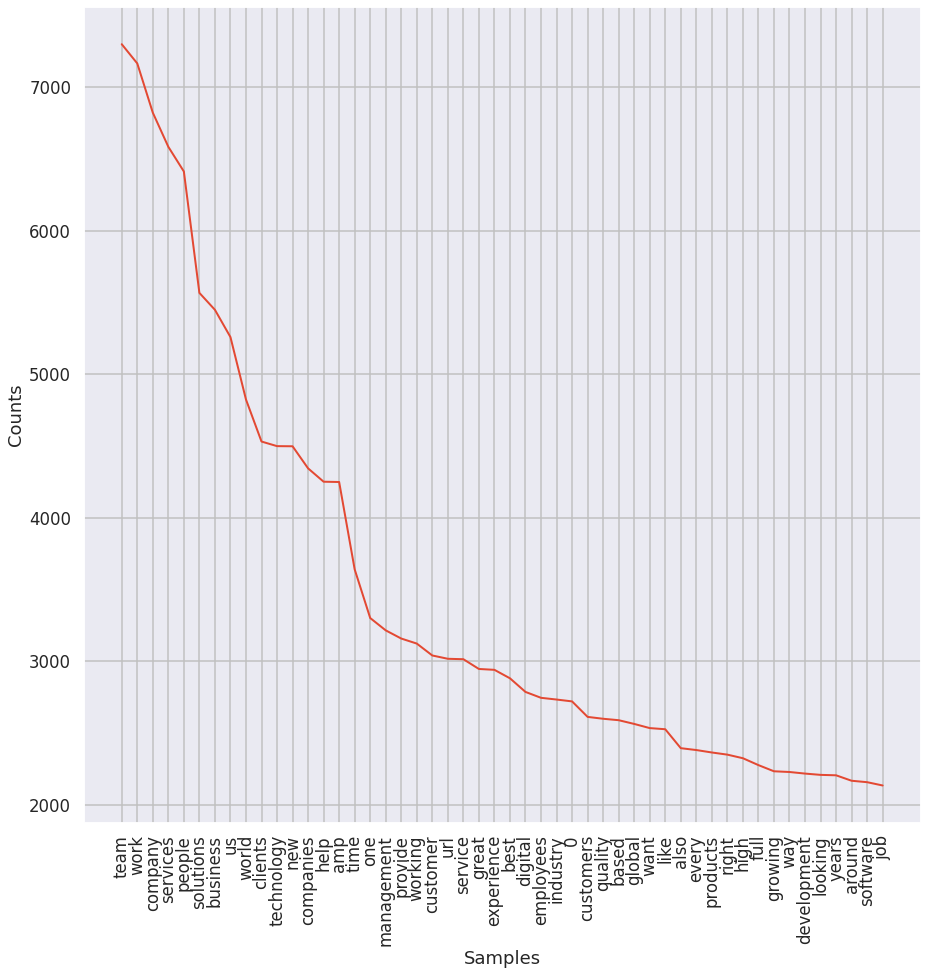

In [33]:
FreqDist(tokens_cp).plot(50)
plt.show()

Looking at the content of fraudulent ads, it appears, the company profile would be more individual focussed, with terms like candidates, recruiting, bonus, staffing, career, signing, referral, etc.

A legitimate company seem to be more mission focussed with terms like: team, people, solutions, help, business, etc.
## 3. Categorical information

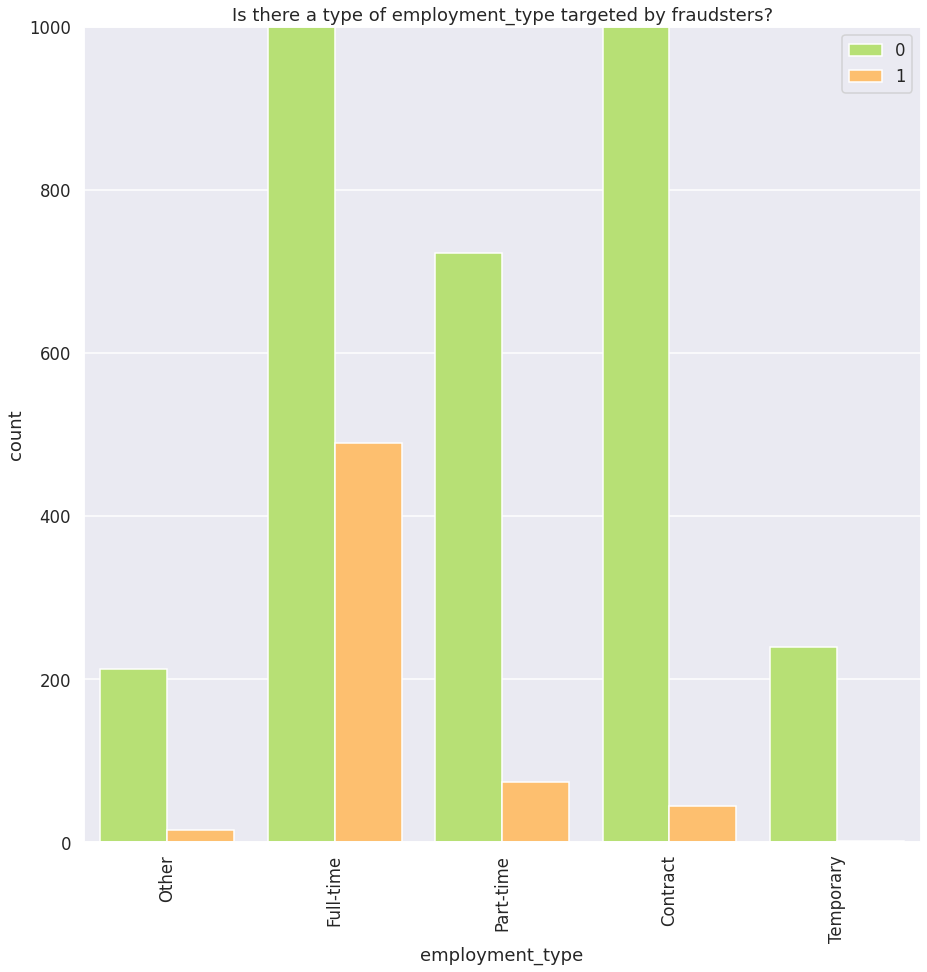

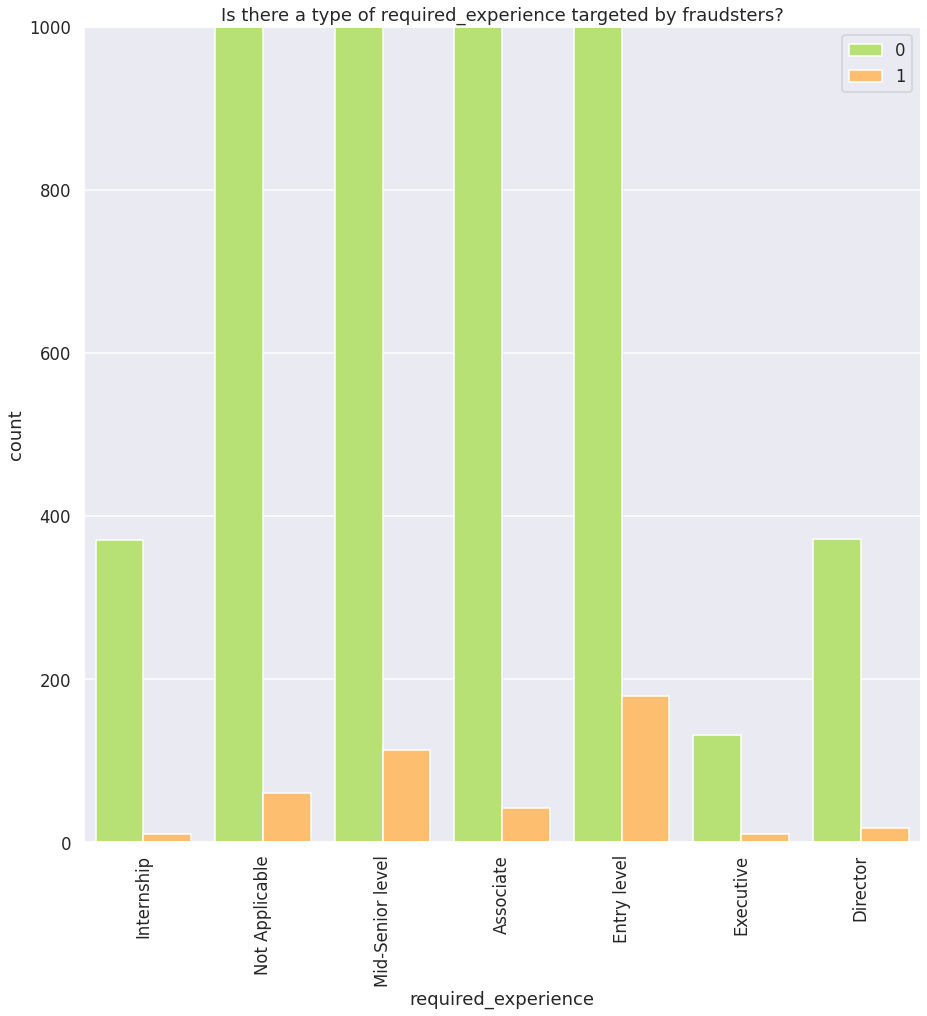

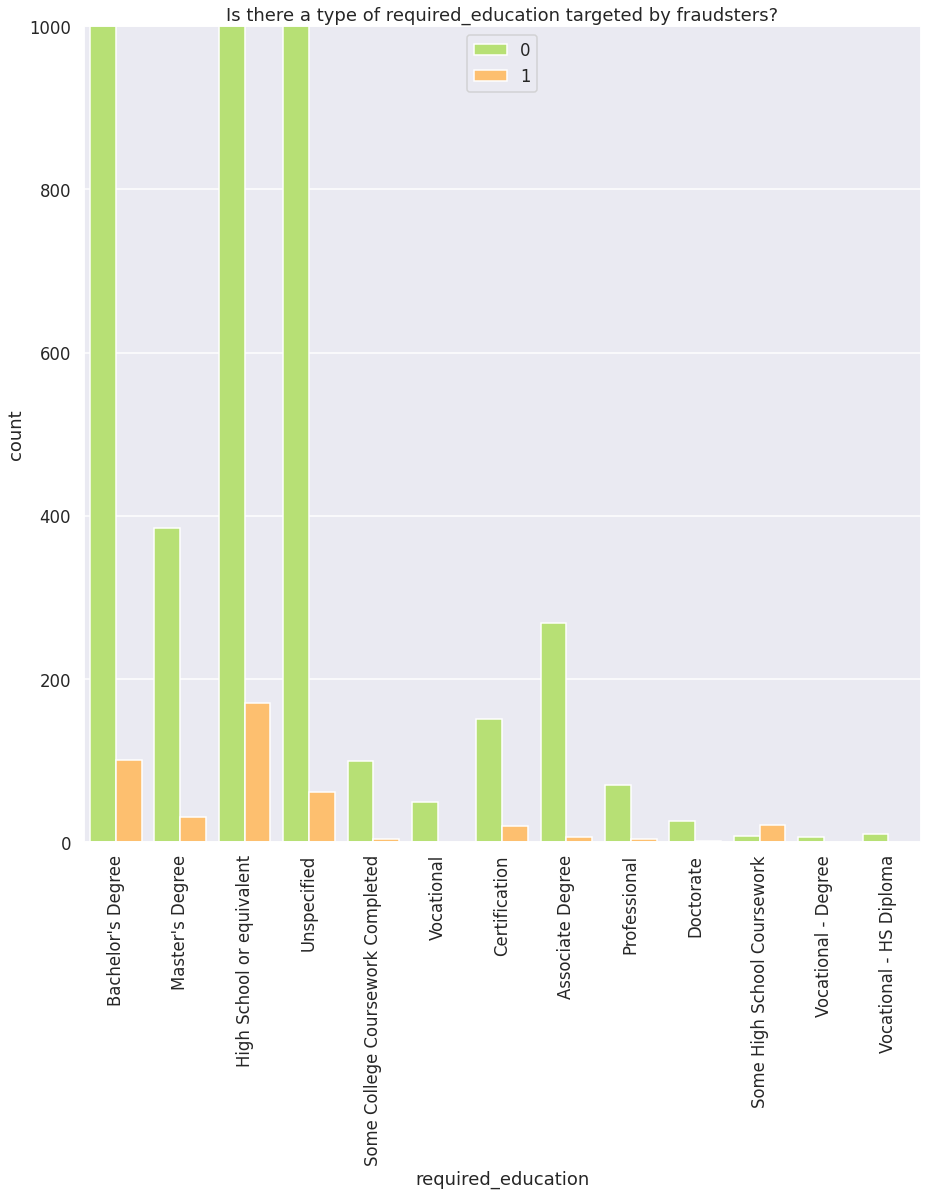

In [15]:
lib.count_plot(df,11,14)

## 4. Extracting extra information

Some job offers have phone, email and/or external url information:

In [16]:
for column in df.columns:
    df[column].fillna('NA', inplace=True)
    
df = df.assign(hasEMAIL=0, hasPHONE=0, hasURL=0)
for column in df.columns[4:8]:
    for i in range(1,len(df[column])):
        if df[column][i].find('#URL_')!=-1:
            df['hasURL'][i] = 1
        elif df[column][i].find('#PHONE_')!=-1:
            df['hasPHONE'][i] = 1
        elif df[column][i].find('#EMAIL_')!=-1:
            df['hasEMAIL'][i] = 1

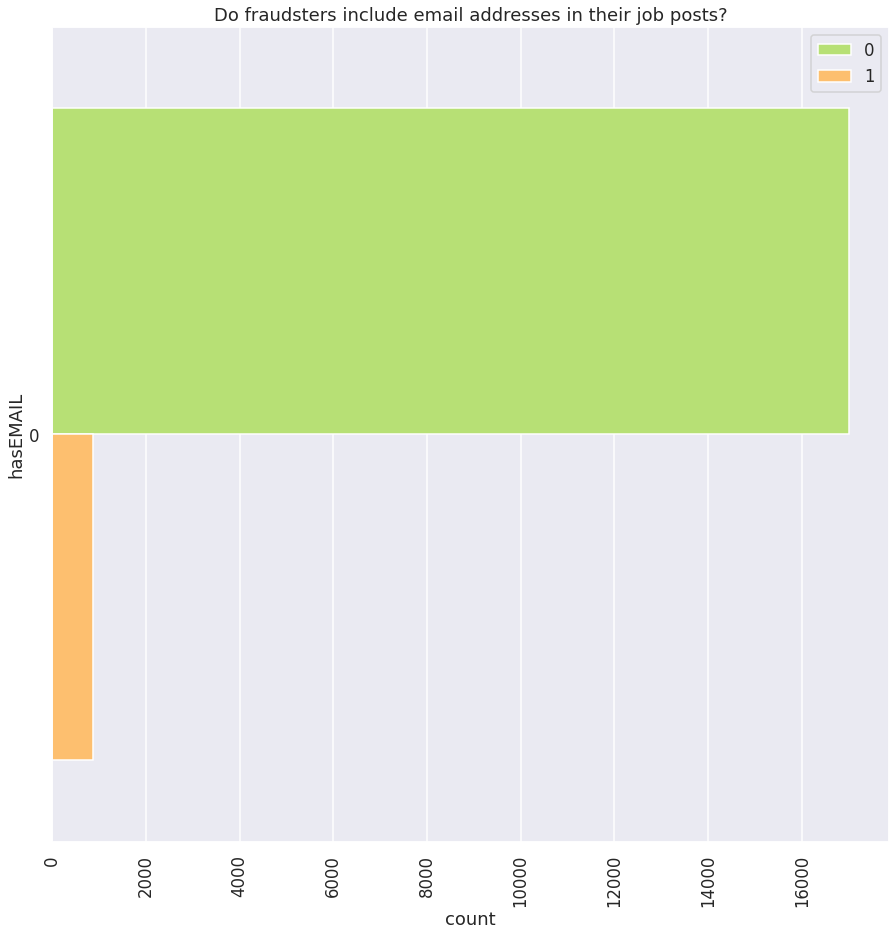

In [17]:
sns.countplot(y='hasEMAIL', hue='fraudulent', palette='RdYlGn_r', data=df, saturation=1, orient='h')
plt.title("Do fraudsters include email addresses in their job posts?")
plt.xticks(rotation=90);
plt.legend();

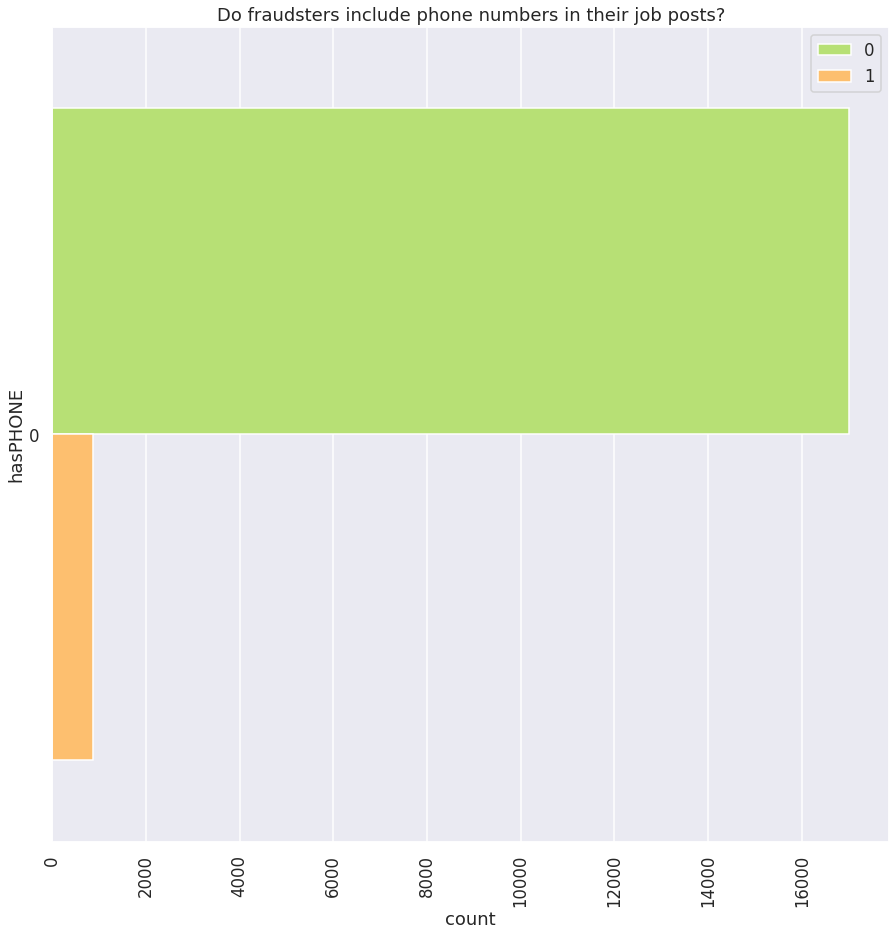

In [18]:
sns.countplot(y='hasPHONE', hue='fraudulent', palette='RdYlGn_r', data=df, saturation=1, orient='h')
plt.title("Do fraudsters include phone numbers in their job posts?")
plt.xticks(rotation=90);
plt.legend();

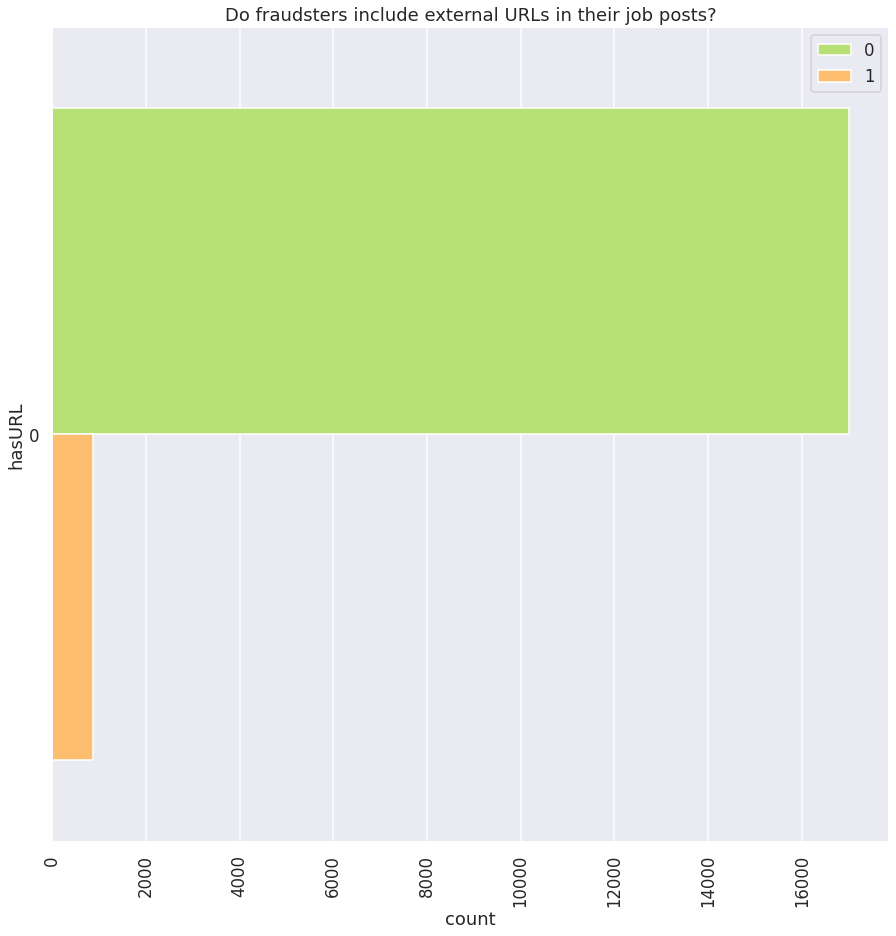

In [19]:
sns.countplot(y='hasURL', hue='fraudulent', palette='RdYlGn_r', data=df, saturation=1, orient='h')
plt.title("Do fraudsters include external URLs in their job posts?")
plt.xticks(rotation=90);
plt.legend();

## 5. Conclusion
Unfortunately looking at the metadata is not going to be enough to identify fraudulent job posts. The fraudulent job posts follow the same pattern as legitimate job posts except:
* they tend to be lacking more information than the legitimate job offers but fraudsters will make an effort for informations such as location, department, function and especially salary_range.
* when information is provided, it will tend to be shorter, the text is going to be more succinct. This is especially true for the company profile and the job requirements.

In terms of content, fraudulent posts will:
* target 'High school degrees or equivalent' and 'Bachelor's Degree' more than any other type of education; Doctorate, Associate Degrees and Vocational were not specifically targeted, some even not targeted at all (in this dataset at least)
* mostly advertise full-time and part-time positions. There are a few fraudulent contractor positions but proportionally less than any other type of positions and temporary contracts were not targeted at all (in this dataset at least)
* target all type of experience but mainly entry level positions. Once again Associates are less exposed and Directors, Executive and Mid-Senior levels are a little less exposed too.
* tend to refer an URL.  This URL is potentially linking to a website that will infect the victim's computer but as phone, emails and urls have been anonymised, it is impossible to confirm this hypothesis.
* NOT communicate a phone number. But most job ads don't anyways.

I hope this gives you a little bit more understanding about fraudulent job offers. The [following notebook](./index.ipynb) will go deeper in the analysis of this dataset and will result in the creation of a classification model helping identify the legitimacy of job posts.